In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from data_preprocessing import *

In [ ]:
truth_X, truth_S, sig_hists_LR_2b1j, bkg_hists_LR_2b1j, ratio_Xbb_LR_2b1j, ratio_2b_LR_2b1j = prepare_hist_allYears(trig='LR_2b1j', X_SH=False)


In [ ]:
truth_X, truth_S, sig_hists_LR_2b2j, bkg_hists_LR_2b2j, ratio_Xbb_LR_2b2j, ratio_2b_LR_2b2j = prepare_hist_allYears(trig='LR_2b2j', X_SH=False)


In [4]:
truth_X, truth_S, sig_hists_LR_resolved, bkg_hists_LR_resolved, ratio_Xbb_LR_resolved, ratio_2b_LR_resolved = prepare_hist_allYears(trig='LR_resolved', X_SH=False)


Preparing histograms for 2018...
Getting signals from /data/rainbolt/sh4b/fixed_sh4b_selection/signal
for 2018 , mc20e , with trigger LR_resolved
Getting background for 2018 with trigger LR_resolved  and btag Xbb
bkg_total [{run_number: 348885, lumi_block: 217, event_number: 93596263, ...}, ..., {...}]
Transfer factor high  :  0.007336648495930097
Transfer factor low   :  0.007598924026996747
Transfer factor total :  0.007514451927504618
Transfer factor mean  :  0.007467786261463422
Number events         :  365955
Getting background for 2018 with trigger LR_resolved  and btag 2b
bkg_total [{run_number: 348885, lumi_block: 227, event_number: 103158746, ...}, ...]
Transfer factor high  :  0.041237113402061855
Transfer factor low   :  0.05955587605251437
Transfer factor total :  0.052256229029253795
Transfer factor mean  :  0.05039649472728811
Number events         :  56906
Getting background for 2018 with trigger LR_resolved  and btag pass
bkg_total [{run_number: 348885, lumi_block: 408,

In [ ]:
truth_X, truth_S, sig_hists_LR, bkg_hists_LR, ratio_Xbb_LR, ratio_2b_LR = prepare_hist_allYears(trig='LR', X_SH=False)


In [7]:
from fitter import Fitter

def run_fit(truth_S, truth_X, sig_hists, bkg_hists, ratio_Xbb, ratio_2b, name='', quick=False):
    exp_limits = []

    for S in truth_S:

        exp_limits_s = []

        for X in truth_X:

            key = f'{X}_{S}'
            
            # print(key)

            sig = sig_hists.get(key, None)
            bkg = bkg_hists.get(key, None)
            ratio_Xbb_ = ratio_Xbb.get(key, None)
            ratio_2b_ = ratio_2b.get(key, None)

            if sig is None:
                # print('-> Signal is None')
                exp_limits_s.append(np.inf)
                continue
                
            # print(S, X)
            if (S not in [400, 500] or X not in [2000]) and quick:
            # if (S not in [500] or X not in [1500]) and quick:
                # print('->')
                exp_limits_s.append(np.inf)
                continue

            print(f'Fitting X = {X}, S = {S}')

            bins = sig[1]
            
            sig     = ak.to_numpy(sig[0])
            bkg     = ak.to_numpy(bkg[0])
            ratio_Xbb_ = ak.to_numpy(ratio_Xbb_)
            ratio_2b_ = ak.to_numpy(ratio_2b_)

            fitter = Fitter(sig, bkg, bins, X, S, debug=False, save_dir=f'plots_fit_{name}/')
            
            fitter.set_bkg_vars(bkg * ratio_Xbb_, bkg * ratio_2b_)
        
            fitter.prepare_fit(plot_summary=True)

            obs_limit, exp_limit = fitter.fit(poi_values=np.linspace(0.01, 350, 500))

            exp_limits_s.append(float(exp_limit))

        exp_limits.append(exp_limits_s)
    return exp_limits

In [8]:
# exp_limits_LR_2b1j = run_fit(truth_S, truth_X, sig_hists_LR_2b1j, bkg_hists_LR_2b1j, ratio_Xbb_LR_2b1j, ratio_2b_LR_2b1j, name='LR_2b1j', quick=False)
# exp_limits_LR_2b1j = np.array(exp_limits_LR_2b1j)
# np.savez('./saved_limits_LR_2b1j', exp_limits_LR_2b1j)

# exp_limits_LR_2b2j = run_fit(truth_S, truth_X, sig_hists_LR_2b2j, bkg_hists_LR_2b2j, ratio_Xbb_LR_2b2j, ratio_2b_LR_2b2j, name='LR_2b2j', quick=False)
# exp_limits_LR_2b2j = np.array(exp_limits_LR_2b2j)
# np.savez('./saved_limits_LR_2b2j', exp_limits_LR_2b2j)

exp_limits_LR_resolved = run_fit(truth_S, truth_X, sig_hists_LR_resolved, bkg_hists_LR_resolved, ratio_Xbb_LR_resolved, ratio_2b_LR_resolved, name='LR_resolved', quick=False)
exp_limits_LR_resolved = np.array(exp_limits_LR_resolved)
np.savez('./saved_limits_LR_resolved', exp_limits_LR_resolved)


exp_limits_LR = run_fit(truth_S, truth_X, sig_hists_LR, bkg_hists_LR, ratio_Xbb_LR, ratio_2b_LR, name='LR', quick=False)
exp_limits_LR = np.array(exp_limits_LR)
np.savez('./saved_limits_LR', exp_limits_LR)

Fitting X = 200, S = 70
Fitting X = 300, S = 70
Fitting X = 400, S = 70
Fitting X = 750, S = 70
Fitting X = 1000, S = 70
Fitting X = 1500, S = 70
Fitting X = 2000, S = 70
Fitting X = 2500, S = 70
Fitting X = 3000, S = 70
Fitting X = 300, S = 100
Fitting X = 400, S = 100
Fitting X = 750, S = 100
Fitting X = 1000, S = 100
Fitting X = 1500, S = 100
Fitting X = 2000, S = 100
Fitting X = 2500, S = 100
Fitting X = 3000, S = 100
Fitting X = 4000, S = 100
Fitting X = 5000, S = 100
Fitting X = 6000, S = 100
Fitting X = 300, S = 170
Fitting X = 400, S = 170
Fitting X = 750, S = 170
Fitting X = 1000, S = 170
Fitting X = 1500, S = 170
Fitting X = 2000, S = 170
Fitting X = 2500, S = 170
Fitting X = 3000, S = 170
Fitting X = 400, S = 200
Fitting X = 750, S = 200
Fitting X = 1000, S = 200
Fitting X = 1500, S = 200
Fitting X = 2000, S = 200
Fitting X = 2500, S = 200
Fitting X = 3000, S = 200
Fitting X = 4000, S = 200
Fitting X = 5000, S = 200
Fitting X = 6000, S = 200
Fitting X = 400, S = 250
Fitting 

NameError: name 'sig_hists_LR' is not defined

In [9]:
# exp_limits_LR_2b1j = np.array(exp_limits_LR_2b1j)
# exp_limits_LR_2b2j = np.array(exp_limits_LR_2b2j)
exp_limits_LR_resolved = np.array(exp_limits_LR_resolved)
# exp_limits_LR = np.array(exp_limits_LR)

# np.savez('./saved_limits_LR_2b1j', exp_limits_LR_2b1j)
# np.savez('./saved_limits_LR_2b2j', exp_limits_LR_2b2j)
np.savez('./saved_limits_LR_resolved', exp_limits_LR_resolved)
# np.savez('./saved_limits_LR', exp_limits_LR)




## Reopen files with saved limits and plot them

In [ ]:
truth_X = [200, 300, 400, 750, 1000, 1500, 2000, 2500, 3000, 4000, 5000, 6000]
truth_S = [70,100, 170, 200, 250, 300, 400, 500, 750, 1000, 1500, 2000, 2500, 3000, 4000, 5000]

In [10]:
labels_x = []
labels_s = []
for x in sorted(set(truth_X)):
    labels_x.append(str(x))
for s in sorted(set(truth_S)):
    labels_s.append(str(s))

In [34]:
from plotting_tools import annotate_heatmap
from matplotlib.colors import LogNorm

labels_x = []
labels_s = []
for x in sorted(set(truth_X)):
    labels_x.append(str(x))
for s in sorted(set(truth_S)):
    labels_s.append(str(s))
        
def plot_limits(exp_limits,
                name='',
                title='',
                cbar_label='95% CL Upper Limit on Cross Section [fb]',
                cmap='Blues',
                color_threshold=0.5,
                comparison=False):
    
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(7, 7))

    if not comparison:
        im = ax.imshow(exp_limits, cmap=cmap, norm=LogNorm(vmin=0.1, vmax=350))
    else:
        im = ax.imshow(exp_limits, cmap=cmap, vmin=-10, vmax=10)

    texts = annotate_heatmap(im, data=None, valfmt="{x:.1f}", threshold=color_threshold,
                             fontsize=9, ha="center", va="center")

    cbar = ax.figure.colorbar(im)
    cbar.ax.set_ylabel("", rotation=-90, va="bottom")
    cbar.set_label(cbar_label, rotation=90, size=15, labelpad=15)

    #Show all ticks and label them with the respective list entries

    ax.set_xticks(np.arange(len(labels_x)), labels=labels_x)
    ax.set_yticks(np.arange(len(labels_s)), labels=labels_s)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    ax.set_xlabel('$m_{X}$ [GeV]', fontsize=18)
    ax.set_ylabel('$m_{S}$ [GeV]', fontsize=18)
    ax.set_title(title, fontsize=14, loc='right')

    fig.tight_layout()
    print("Saving... plots_fit" +"/"+  "Limits_" + name + '.pdf')
    plt.savefig("plots_fit" +"/"+  "Limits_" + name + '.pdf')
    plt.show()


In [32]:
limits_LR_2b1j     = np.load('./saved_limits_LR_2b1j.npz')
limits_LR_2b2j     = np.load('./saved_limits_LR_2b2j.npz')
limits_LR_resolved = np.load('./saved_limits_LR_resolved.npz')
limits_LR          = np.load('./saved_limits_LR.npz')

exp_limits_LR_2b1j     = limits_LR_2b1j['arr_0']
exp_limits_LR_2b2j     = limits_LR_2b2j['arr_0']
exp_limits_LR_resolved = limits_LR_resolved['arr_0']
exp_limits_LR          = limits_LR['arr_0']



In [ ]:
plot_limits(exp_limits_LR_2b1j, name='exp_limits_LR_2b1j_Sep16')

In [ ]:

plot_limits(exp_limits_LR_2b2j, name='exp_limits_LR_2b2j_Sep16')


Saving... plots_fit/Limits_exp_limits_LR_resolved_Sep6.pdf


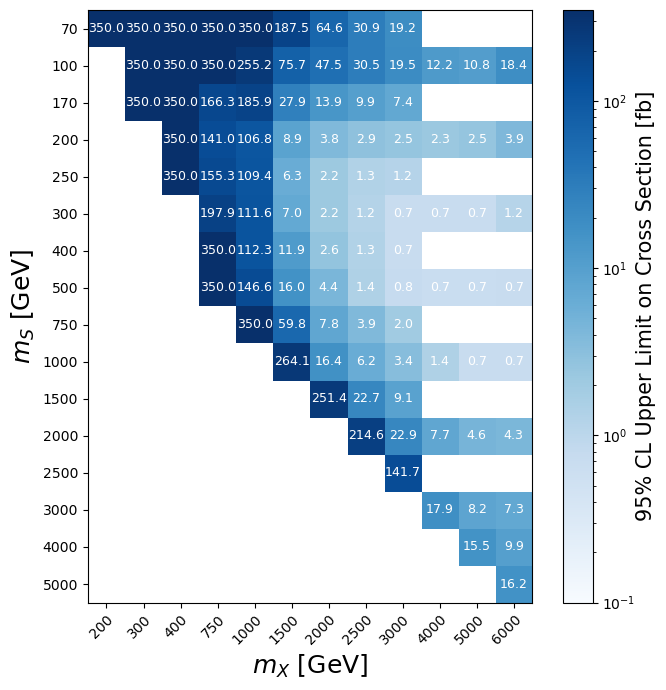

In [13]:
plot_limits(exp_limits_LR_resolved, name='exp_limits_LR_resolved_Sep16')


In [ ]:
plot_limits(exp_limits_LR, name='exp_limits_LR_Sep16')


/tmp/ipykernel_285/3896168998.py:1: RuntimeWarning: invalid value encountered in subtract
  perc_diff = (exp_limits_LR_resolved - exp_limits_LR) / exp_limits_LR * 100


Saving... plots_fit/Limits_LR_resolved_vs_LR_perc_diff_16Sep.pdf


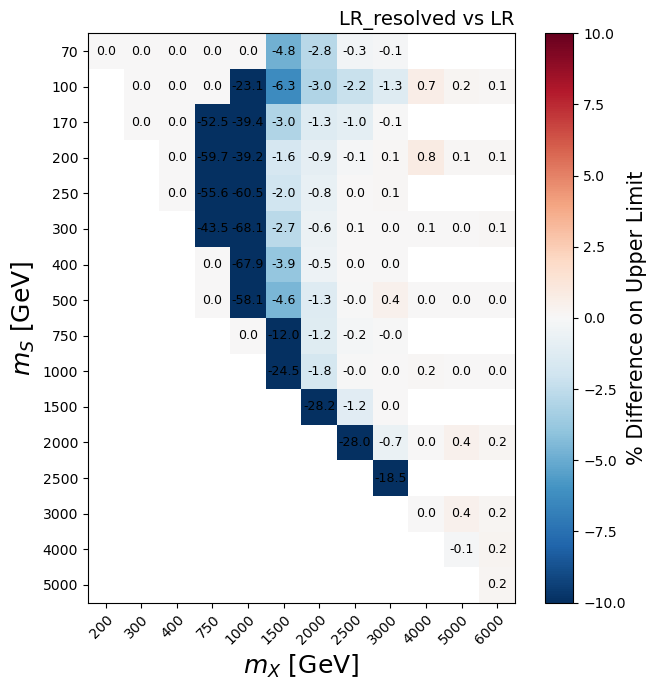

In [37]:
perc_diff = (exp_limits_LR_resolved - exp_limits_LR) / exp_limits_LR * 100
plot_limits(perc_diff, name='LR_resolved_vs_LR_perc_diff_16Sep',
            title='LR_resolved vs LR',
            cbar_label='% Difference on Upper Limit',
            cmap='RdBu_r',
            color_threshold=100,
            comparison=True)


In [ ]:
jackson = [
[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], # 70
[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], # 100
[0., 0., 0., 42.8, 14.8, 5.4, 4.2, 4.2, 5.2, 0., 0., 0.], # 170
[0., 0., 0., 62.4, 18.8, 5.1, 2.9, 2.7, 3.0, 4.7, 10.5, 0.], # 200
[0., 0., 0., 88.1, 40.1, 6.5, 3.8, 2.0, 2.0, 0., 0., 0.], # 250
[0., 0., 0., 67.3, 23.6, 8.2, 3.5, 2.0, 1.5, 1.9, 4.0, 0.], # 300
[0., 0., 0., 101.1, 15.3, 4.1, 2.4, 1.7, 1.0, 0., 0., 0.], # 400
[0., 0., 0., 2159.8, 22.7, 4.2, 1.9, 1.3, 1.1, 0.7, 1.0, 0.], # 500
[0., 0., 0., 0., 4994.0, 9.4, 2.2, 1.0, 0.7, 0., 0., 0.], # 750
[0., 0., 0., 0., 0., 32.5, 3.6, 1.5, 0.8, 0.5, 0.8, 0.], # 1000
[0., 0., 0., 0., 0., 0., 51.6, 4.8, 1.6, 0., 0., 0.], # 1500
[0., 0., 0., 0., 0., 0., 0., 53.4, 6.7, 1.3, 1.0, 0.], # 2000
[0., 0., 0., 0., 0., 0., 0., 0., 88.6, 0., 0., 0.], # 2500
[0., 0., 0., 0., 0., 0., 0., 0., 0., 14.2, 3.3, 0.], # 3000
[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 31.0, 0.], # 4000
[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], # 5000
]

jackson = np.array(jackson)

perc_diff = (jackson - exp_limits_OR_XSH) / exp_limits_OR_XSH * 100
plot_limits(perc_diff, name='jackson_perc_diff',
            title='NF OR_XSH vs OR_XSH',
            cbar_label='% Difference on Upper Limit',
            cmap='RdBu_r',
            color_threshold=100,
            comparison=True)